In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [18]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [19]:
x_train=x_train/255.0
x_test=x_test/255.0

In [20]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [35]:
model = Sequential([
    Flatten(input_shape=(32, 32, 3)), 
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [36]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 402,250 (1.53 MB)

 Trainable params: 402,250 (1.53 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [38]:
test_loss,test_accuracy=model.evaluate(x_test,y_test)
print(f'\n test accuracy:{test_accuracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 658us/step - accuracy: 0.0950 - loss: 2.4974

 test accuracy:0.0933


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2513 - loss: 2.0330 - val_accuracy: 0.3626 - val_loss: 1.7948
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3631 - loss: 1.7623 - val_accuracy: 0.3821 - val_loss: 1.7162
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4052 - loss: 1.6739 - val_accuracy: 0.4153 - val_loss: 1.6475
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4190 - loss: 1.6311 - val_accuracy: 0.4207 - val_loss: 1.6313
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4369 - loss: 1.5789 - val_accuracy: 0.4398 - val_loss: 1.5971
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4498 - loss: 1.5471 - val_accuracy: 0.4260 - val_loss: 1.6176
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4537 - loss: 1.5319 - val_accuracy: 0.4470 - val_loss: 1.5719
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4627 - loss: 1.5032 - 

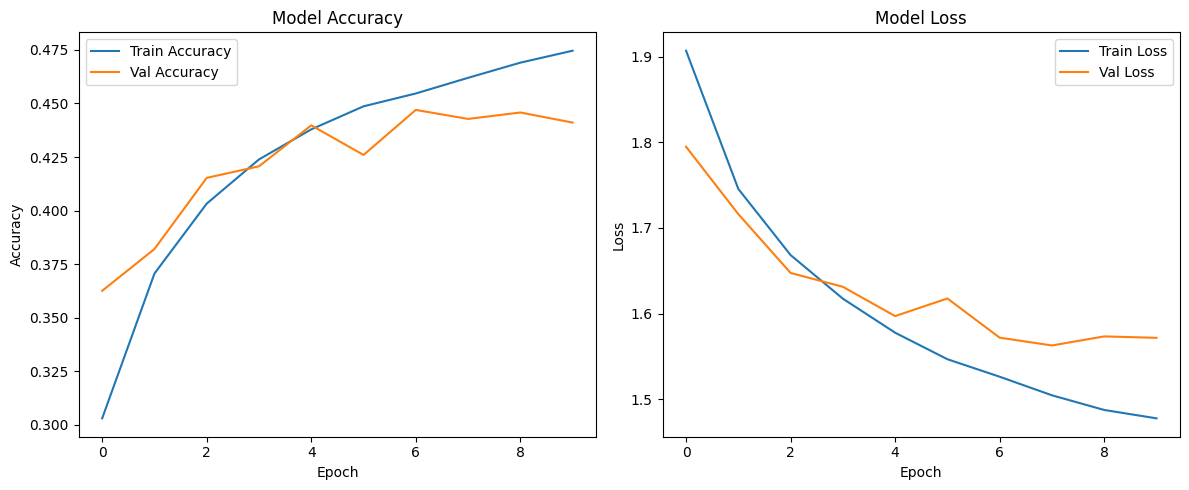

In [39]:
import matplotlib.pyplot as plt


history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()